<a href="https://colab.research.google.com/github/kartik-555/TimeSeriesAnalysis_LSTM_RNN/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Tested on Python 3.8.10
!pip install tensorflow==2.12.0
!pip install statsmodels==0.14.0
!pip install numpy==1.23.5
!pip install scikit-learn==1.2.2
!pip install seaborn==0.12.2
!pip install matplotlib==3.7.1
!pip install pandas==2.0.2
!pip install yfinance==0.2.18
!pip install pandas_datareader==0.10.0
!pip install pandas_ta==0.3.14b
!pip install projectpro

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 8.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Un

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 55.4 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.4
    Uninstalling statsmodels-0.14.4:
      Successfully uninstalled statsmodels-0.14.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 56.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
bigfra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 55.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.2 which is incompatible.
xarray 2025.1.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.1 requires pandas>=2.1, but you have pandas 2.0.2 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 2.0.2 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 2.0.2 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you ha

In [4]:
from datetime import datetime
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import yfinance as yf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
import pandas_ta as ta
from projectpro import model_snapshot, checkpoint
from keras.layers import LSTM, SimpleRNN
from keras.models import Sequential
from keras.layers import Dense

In [47]:
keras.backend.set_image_data_format("channels_last")
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


yf.pdr_override()


In [6]:
dataset = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())

[*********************100%***********************]  1 of 1 completed


In [7]:
dataset.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.388997,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.455580,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.593860,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.725512,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.705330,394024400


In [8]:

tstart = 2016  # Start year
tend = 2020    # End year

In [9]:
def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)

    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)

    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("Apple stock price")

    plt.show()

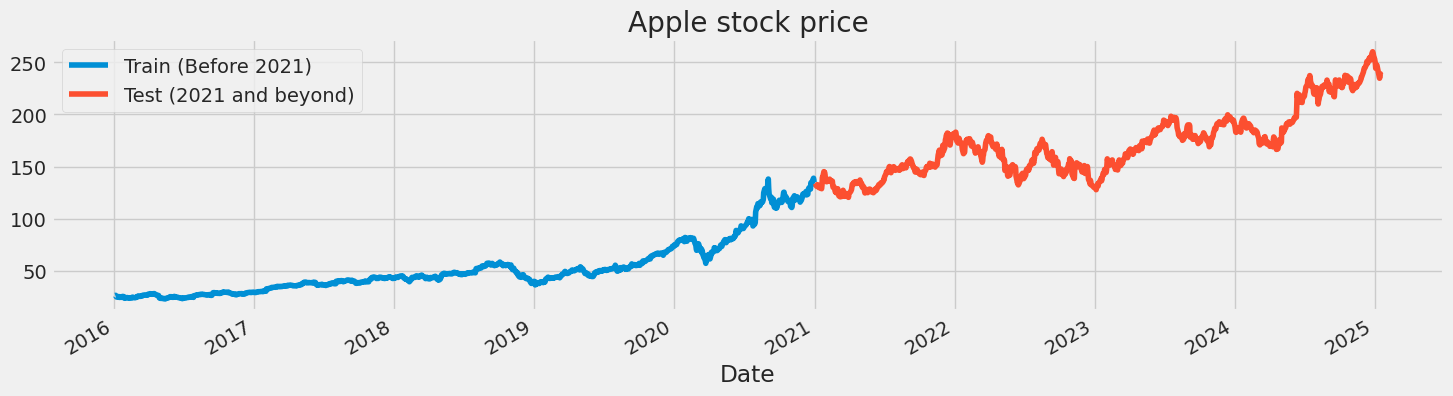

In [10]:
train_test_plot(dataset, tstart, tend)


In [11]:
def train_test_split(dataset, tstart, tend, columns=['High']):
    train = dataset.loc[f"{tstart}":f"{tend}", columns].values

    test = dataset.loc[f"{tend+1}":, columns].values

    return train, test

In [12]:
training_set, test_set = train_test_split(dataset, tstart, tend)

In [13]:
sc = MinMaxScaler(feature_range=(0, 1))

training_set = training_set.reshape(-1, 1)

training_set_scaled = sc.fit_transform(training_set)

In [14]:
n_steps = 1
features = 1

In [15]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [16]:
X_train, y_train = split_sequence(training_set_scaled, n_steps)

In [17]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], features)

In [18]:
def plot_predictions(test, predicted, title):
    plt.plot(test, color="gray", label="Real")

    plt.plot(predicted, color="red", label="Predicted")

    plt.title(f'{title}')
    plt.xlabel("Time")
    plt.ylabel(f'{title}')

    plt.legend()

    plt.show()

In [19]:
def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))

    print("The root mean squared error is {:.2f}.".format(rmse))

In [20]:
def plot_loss(history):
    plt.figure(figsize=(15, 10))

    plt.plot(history.history['loss'], label='loss')

    plt.legend(loc='best')
    plt.show()

In [21]:
model_rnn = Sequential()

model_rnn.add(SimpleRNN(units=125, input_shape=(n_steps, features)))

model_rnn.add(Dense(units=1))

In [22]:
model_rnn.compile(optimizer="RMSprop", loss="mse")

In [23]:

history = model_rnn.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

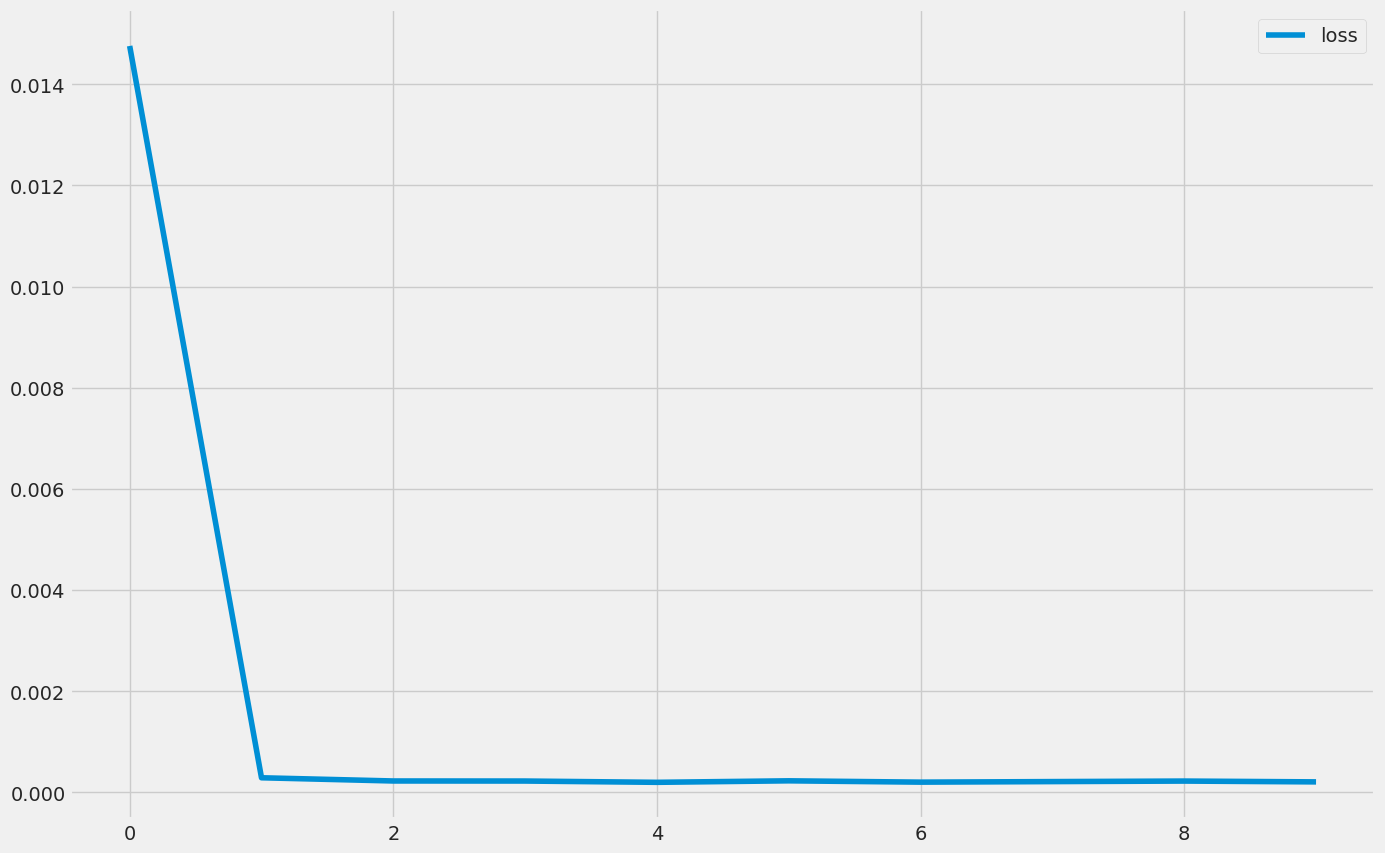

In [24]:
plot_loss(history)


In [25]:
inputs = sc.transform(test_set.reshape(-1, 1))

In [26]:
X_test, y_test = split_sequence(inputs, n_steps)

X_test = X_test.reshape(-1, n_steps, features)

In [27]:
predicted_stock_price = model_rnn.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

32/32 [==============================] - 1s 4ms/step


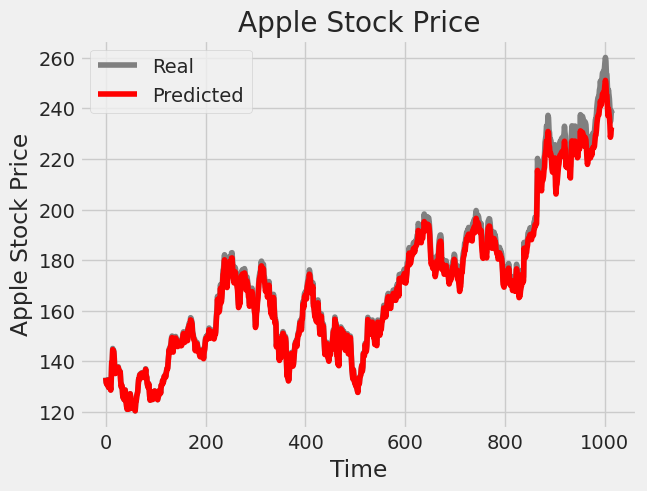

In [28]:
plot_predictions(test_set, predicted_stock_price, "Apple Stock Price")

In [29]:
steps_in_future = 25


In [30]:
def sequence_generation(dataset: pd.DataFrame, sc: MinMaxScaler, model: Sequential, steps_future: int):
    high_dataset = dataset.iloc[len(dataset) - len(test_set) - n_steps:]["High"]

    high_dataset = sc.transform(high_dataset.values.reshape(-1, 1))

    inputs = high_dataset[:n_steps]

    for _ in range(steps_future):
        curr_pred = model.predict(inputs[-n_steps:].reshape(-1, n_steps, features), verbose=0)

        inputs = np.append(inputs, curr_pred, axis=0)

    return sc.inverse_transform(inputs[n_steps:])

In [31]:
results = sequence_generation(dataset, sc, model_rnn, steps_in_future)

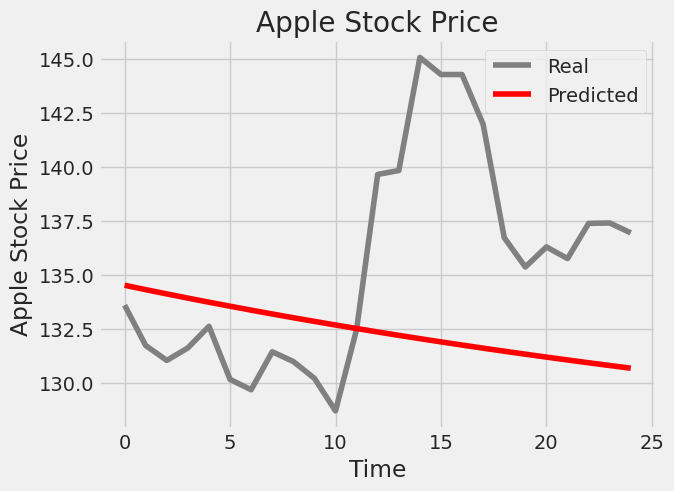

In [32]:
plot_predictions(test_set[:steps_in_future], results, "Apple Stock Price")

In [33]:
model_lstm = Sequential()

model_lstm.add(LSTM(units=125, input_shape=(n_steps, features)))

model_lstm.add(Dense(units=1))

In [34]:
model_lstm.compile(optimizer="RMSprop", loss="mse")

In [35]:
history = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

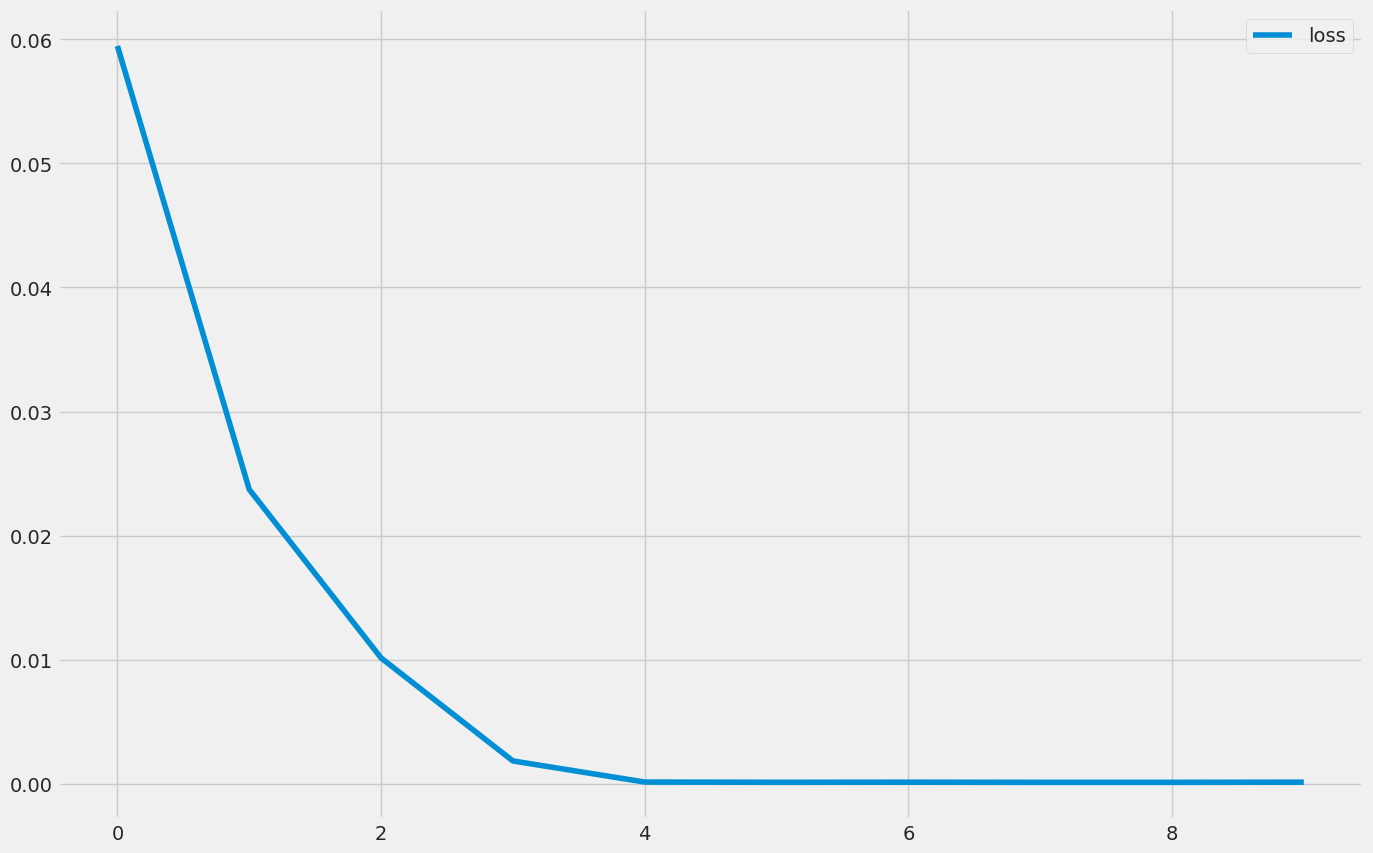

In [36]:
plot_loss(history)

In [37]:
predicted_stock_price = model_lstm.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

32/32 [==============================] - 3s 4ms/step


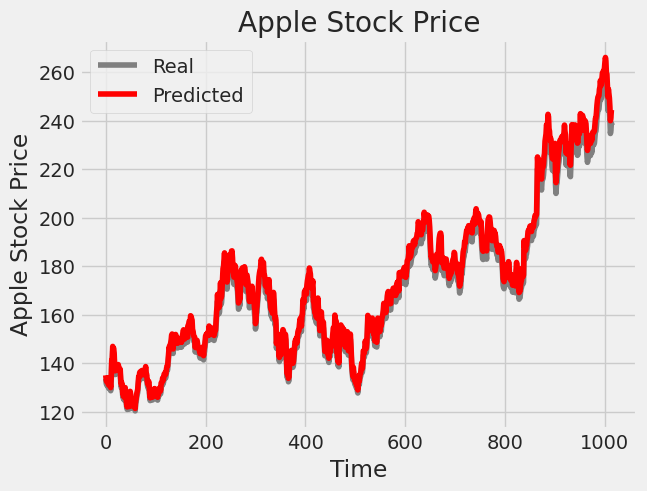

In [38]:
plot_predictions(test_set, predicted_stock_price, "Apple Stock Price")

In [39]:
results = sequence_generation(dataset, sc, model_lstm, steps_in_future)

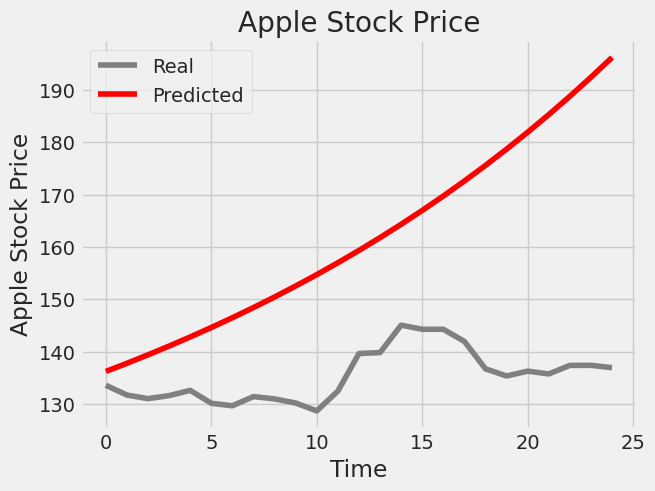

In [40]:
plot_predictions(test_set[:steps_in_future], results, "Apple Stock Price")

In [41]:
model_lstm = Sequential()

model_lstm.add(LSTM(units=125, input_shape=(n_steps, features)))

model_lstm.add(Dense(units=1))

In [42]:
model_lstm.compile(optimizer="RMSprop", loss="mse")

In [43]:
history = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

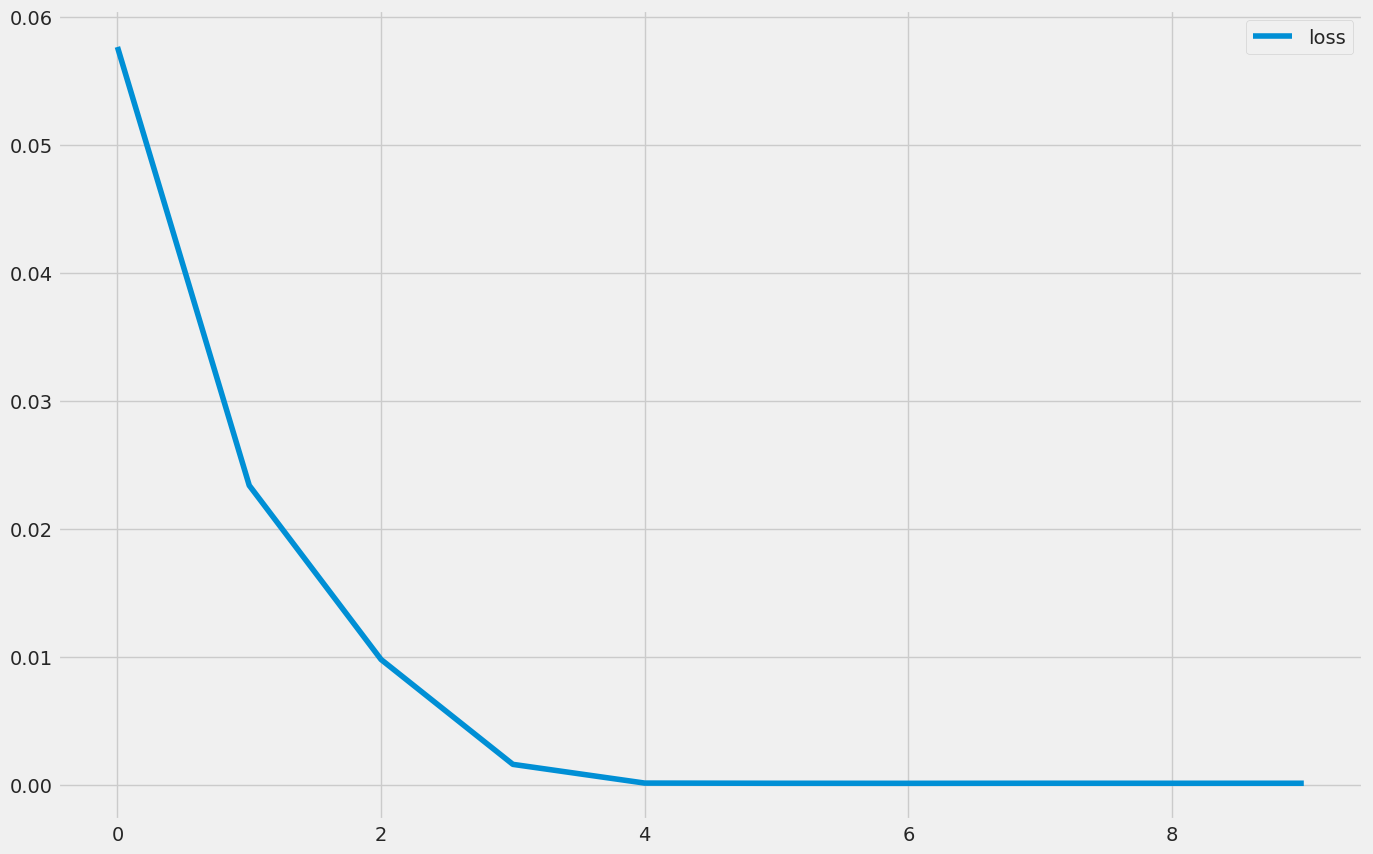

In [44]:
plot_loss(history)


In [45]:
predicted_stock_price = model_lstm.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

32/32 [==============================] - 1s 3ms/step


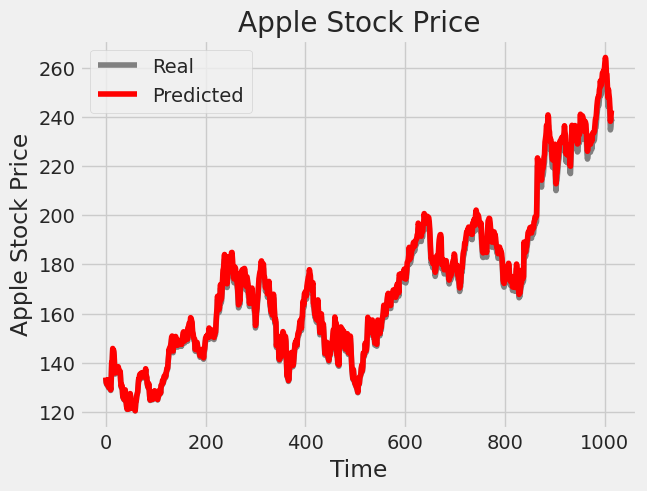

In [46]:
plot_predictions(test_set, predicted_stock_price, "Apple Stock Price")